

# New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis  
    

## Business Understanding:


The selected dataset documents all reported crimes in the 5 boroughs of New York City up to but excluding murder.  We hope to gather insights related to location, probability and crime type classification.  With these findings, we believe we could make recommendations on police training, shift allocations, and jail/prison capacity.  

This data has been gathered from https://www.kaggle.com/adamschroeder/crimes-new-york-city.
  
Dataset has 1,048,575  observations with 24 columns  
  
|Variable Label|Variable Type|Data Description|
| :-|:-|:-|
|CMPLNT_NUM|Continuous|Randomly generated persistent ID for each complaint |
|CMPLNT_FR_DT|Datestamp|	Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|
|CMPLNT_FR_TM|Timestamp|	Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|
|CMPLNT_TO_DT|Datestamp|	Ending date of occurrence for the reported event, if exact time of occurrence is unknown|
|CMPLNT_TO_TM|Timestamp|	Ending time of occurrence for the reported event, if exact time of occurrence is unknown|
|RPT_DT|Datestamp|	Date event was reported to police |
|KY_CD|Categorical|	Three digit offense classification code|
|OFNS_DESC	|Categorical (string)|Description of offense corresponding with key code|
|PD_CD	|Categorical|Three digit internal classification code (more granular than Key Code)|
|PD_DESC|Categorical (string)|	Description of internal classification corresponding with PD code (more granular than Offense Description)|
|CRM_ATPT_CPTD_CD|Categorical|	Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|
|LAW_CAT_CD|Categorical|	Level of offense: felony, misdemeanor, violation |
|JURIS_DESC|Categorical|	Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc.|
|BORO_NM	|Categorical|The name of the borough in which the incident occurred|
|ADDR_PCT_CD	|Categorical|The precinct in which the incident occurred|
|LOC_OF_OCCUR_DESC|Categorical|	Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|
|PREM_TYP_DESC|Categorical|	Specific description of premises; grocery store, residence, street, etc.|
|PARKS_NM	|Categorical|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|
|HADEVELOPT|Categorical|	Name of NYCHA housing development of occurrence, if applicable|
|X_COORD_CD|Continuous|	X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Y_COORD_CD|Continuous|	Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|
|Latitude|Continuous|	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326) |
|Longitude|Continuous|	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|

This dataset has a second file provided that provides each of the 5 borough population metrics by decade from 1950 with projections through 2040.




Describe how you would define and measure the outcomes  
For instance TPR/FPR  
Why is the data important  
How would you measure the effectiveness of a good prediction algorithm  
Like RMSE, Accuracy  
  
Data Meaning Type:  
Describe the meaning and type of data for each attributes  
Scale, values, etc  
What is the one sentence that describes what the attribute is?  
It's important to know when the data attribute would be available  
It isn't helpful to bring data into a model that won't be available at the time we run the mode  

### EDA Plan:

1.  Clean up variable types
2.  Add variables for day of week, month and year based on date variables  
3.  Add times of day or shift allocations to time variable


  
Additional Considerations:
 - weather data to see how weather affects crime
 - Unemployment statistics

#### Weather Data

Weather data was captured from https://www.ncdc.noaa.gov/.  I pulled all weather data from 2010 to 2020 and set the location as Central Park Station.  

Variables captured are described as follows:

|Variable code|Description|Unit of Measure|
|:-|:-|:-|
|PRCP|Precipitation|Inches|
|SNOW|Snowfall|Inches|
|TMAX|Maximum temperature|Fahrenheit|
|TMIN|Minimum temperature|Fahrenheit|

### Follow Up Items:

1. I need to redirect the csv file to the github repo directly once I post it there.  I should be able to copy the logic from this (df = pd.read_csv('https://raw.githubusercontent.com/eclarson/DataMiningNotebooks/master/data/titanic.csv') # read in the csv file) read in from Dr. Larsen to do so.  I need first to make available the full dataset on the github for it to work.  I don't know if by posting the file I will interfere with the team, so I need to ask/research that.  For now, I'll work locally off the datafile and push only the notebook


### Notes for the team

1.  Do we want to consider only assessing top 20 crimes?
2.  Do we want to consider dropping latency reporting of crimes?


In [6]:
import pandas as pd
import altair as alt
import pandas_profiling
import numpy as np
from datetime import datetime 
from datetime import date
import calendar
import time
import math
import seaborn as sns

In [7]:
df_Crime = pd.read_csv('NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Brian's super fancy functions to scrub the time data

In [8]:
def combineDateTime(Date,Time):
    
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            Date = month+'/'+day+'/'+year
        
        datetime(int(year),int(month),int(day)) #this checks if it's a proper date format
        
        myDateTime = str(Date)+' '+str(Time)
        datetime.strptime(myDateTime, "%m/%d/%Y %H:%M:%S")
    except:
        myDateTime = None
        
    return myDateTime

def getHours(fromDateTime, toDateTime):
    dateDiff = None
    
    try:
        if (fromDateTime !=None) & (toDateTime != None):
            start = datetime.strptime(fromDateTime, "%m/%d/%Y %H:%M:%S")
            end = datetime.strptime(toDateTime, "%m/%d/%Y %H:%M:%S")
            dateDiff = end - start
            dateDiff = dateDiff.seconds
            dateDiff = math.ceil(dateDiff/60/60)
    except:
        dateDiff = None
    
    return dateDiff

def getDaysBtwnDates(fromDate, toDate):
    dateDiff = None
    
    try: 
        month1,day1,year1 = str(fromDate).split('/')
        month2,day2,year2 = str(toDate).split('/')
        start = date(int(year1),int(month1),int(day1))
        end = date(int(year2),int(month2),int(day2))
        dateDiff = end - start
        dateDiff = dateDiff.days
            
    except:
        dateDiff = None
    
    return dateDiff

def getSeason(Date):
    season = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #define seasons by month
        Winter = [12,1,2]
        Spring = [3,4,5]
        Summer = [6,7,8]
        Fall = [9,10,11]
        
        if Winter.count(int(month)) == 1:
            season = 'Winter'
        elif Spring.count(int(month)) == 1:
            season = 'Spring'
        elif Summer.count(int(month)) == 1:
            season = 'Summer'
        elif Fall.count(int(month)) == 1:
            season = 'Fall'
    except:
        season = None
    
    return season

def getDayTime(Time):
    daytime = None
    
    try:
        hour,minute,second = str(Time).split(':')
        val = int(str(hour)+str(minute)) #convert into a number
        
        #evaluate the resulting value to determine day time
        if (val>200)&(val<=600):
            daytime = 'Early Morning'
        elif (val>600)&(val<=1000):
            daytime = 'Morning'
        elif (val>1000)&(val<=1400):
            daytime = 'Day'
        elif (val>1400)&(val<=1800):
            daytime = 'Evening'
        elif (val>1800)&(val<=2200):
            daytime = 'Night'
        elif (val>2200)&(val<=2400):
            daytime = 'Late Night'
        elif (val>=100)&(val<=200):
            daytime = 'Late Night'
    except:
        daytime = None
    
    return daytime

def getMonth(Date):
    val = None
    try:
        #strip month out
        month,day,year = str(Date).split('/')
        #mo = month
        dto = datetime.strptime(month,"%m")
        val = dto.strftime("%B") #date(1900, mo, 1).strftime('%B')

    except:
        val = None
    
    return val

def getDay(Date):
    val = None
    try:
        #strip day out
        month,day,year = str(Date).split('/')

        val = int(day)

    except:
        val = None
    
    return val

def getDayName(Date):
    val = None
    try:
        if (Date != None):

            dto = datetime.strptime(str(Date), "%Y-%m-%d %H:%M:%S")
            val = dto.strftime("%A")
        
    except:
        val = None
    
    return val

def getYear(Date):
    val = None
    try:
        #strip year out
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
   
        val = int(year)

    except:
        val = None
    
    return val

def cleanDate(Date):
    newDate = None
    try:
        month,day,year = str(Date).split('/')
        if year == '1015':
            year = '2015'
            newDate = str(month)+'/'+str(day)+'/'+str(year)
        else:
            newDate = str(month)+'/'+str(day)+'/'+str(year)

    except:
        newDate = None
        
    return newDate

#### Converting date fields

In [9]:
df_Crime['CMPLNT_FR_DT'] = df_Crime.apply(lambda x: cleanDate(x['CMPLNT_FR_DT']),axis=1)

In [10]:
df_Crime['CMPLNT_TO_DT'] = df_Crime.apply(lambda x: cleanDate(x['CMPLNT_TO_DT']),axis=1)

In [11]:
df_Crime['Start_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_FR_DT'],x['CMPLNT_FR_TM']),axis=1)

In [12]:
df_Crime['End_Dt_Tm'] = df_Crime.apply(lambda x: combineDateTime(x['CMPLNT_TO_DT'],x['CMPLNT_TO_TM']),axis=1)

In [13]:
df_Crime['Day_Name'] = df_Crime.apply(lambda x: getDayName(x['Start_Dt_Tm']),axis=1)

In [14]:
df_Crime['Duration'] = df_Crime.apply(lambda x: getHours(x['Start_Dt_Tm'],x['End_Dt_Tm']),axis=1)

In [15]:
df_Crime['Duration_to_PD'] = df_Crime.apply(lambda x: getDaysBtwnDates(x['CMPLNT_FR_DT'],x['RPT_DT']),axis=1)

In [16]:
df_Crime['Month'] = df_Crime.apply(lambda x: getMonth(x['CMPLNT_FR_DT']),axis=1)

In [17]:
df_Crime['Day'] = df_Crime.apply(lambda x: getDay(x['CMPLNT_FR_DT']),axis=1)

In [18]:
df_Crime['Year'] = df_Crime.apply(lambda x: getYear(x['CMPLNT_FR_DT']),axis=1)

In [19]:
#Cut duration into bins (short, medium and long)
df_Crime['Duration_lbl'] = pd.cut(x=df_Crime['Duration'], bins=[1,8,16,26], labels=['Short', 'Medium', 'Long'], right=False)

In [20]:
#cut start time into seasonal bins
df_Crime['Season'] = df_Crime.apply(lambda x: getSeason(x['CMPLNT_FR_DT']),axis=1)

In [21]:
#cut start time into daytime bins
df_Crime['Daytime'] = df_Crime.apply(lambda x: getDayTime(x['CMPLNT_FR_TM']),axis=1)

In [22]:
df_Crime['Start_Dt_Tm'] = pd.to_datetime(df_Crime['Start_Dt_Tm'])

In [23]:
df_Crime['End_Dt_Tm'] = pd.to_datetime(df_Crime['End_Dt_Tm'])

In [24]:
df_Crime.dtypes

CMPLNT_NUM                    int64
CMPLNT_FR_DT                 object
CMPLNT_FR_TM                 object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
RPT_DT                       object
KY_CD                         int64
OFNS_DESC                    object
PD_CD                       float64
PD_DESC                      object
CRM_ATPT_CPTD_CD             object
LAW_CAT_CD                   object
JURIS_DESC                   object
BORO_NM                      object
ADDR_PCT_CD                 float64
LOC_OF_OCCUR_DESC            object
PREM_TYP_DESC                object
PARKS_NM                     object
HADEVELOPT                   object
X_COORD_CD                  float64
Y_COORD_CD                  float64
Latitude                    float64
Longitude                   float64
Lat_Lon                      object
Start_Dt_Tm          datetime64[ns]
End_Dt_Tm            datetime64[ns]
Day_Name                     object
Duration                    

In [25]:
df_Crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,End_Dt_Tm,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime
0,101109527,12/31/2015,23:45:00,None,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaT,None,NaN,0.0,December,31.0,2015.0,NaN,Winter,Late Night
1,153401121,12/31/2015,23:36:00,None,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaT,None,NaN,0.0,December,31.0,2015.0,NaN,Winter,Late Night
2,569369778,12/31/2015,23:30:00,None,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaT,None,NaN,0.0,December,31.0,2015.0,NaN,Winter,Late Night
3,968417082,12/31/2015,23:30:00,None,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaT,None,NaN,0.0,December,31.0,2015.0,NaN,Winter,Late Night
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,2015-12-31 23:30:00,None,1.0,0.0,December,31.0,2015.0,Short,Winter,Late Night


In [26]:
print (df_Crime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int64         
 1   CMPLNT_FR_DT       1048510 non-null  object        
 2   CMPLNT_FR_TM       1048575 non-null  object        
 3   CMPLNT_TO_DT       842616 non-null   object        
 4   CMPLNT_TO_TM       843002 non-null   object        
 5   RPT_DT             1048575 non-null  object        
 6   KY_CD              1048575 non-null  int64         
 7   OFNS_DESC          1045695 non-null  object        
 8   PD_CD              1047842 non-null  float64       
 9   PD_DESC            1047842 non-null  object        
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object        
 11  LAW_CAT_CD         1048575 non-null  object        
 12  JURIS_DESC         1048575 non-null  object        
 13  BORO_NM            1048575 

In [27]:
df_Crime.BORO_NM.count()

1048575

In [28]:
#trying to group by boroughs
df_Crime['BORO_NM'].value_counts()

BROOKLYN         315648
MANHATTAN        244749
BRONX            227477
QUEENS           211958
STATEN ISLAND     48743
Name: BORO_NM, dtype: int64

In [29]:
df_Crime['Season'].value_counts()

Fall      287723
Summer    264402
Winter    250920
Spring    245465
Name: Season, dtype: int64

In [30]:
df_Crime['Daytime'].value_counts()

Evening          243485
Night            229188
Day              191222
Late Night       123356
Morning          122594
Early Morning     88855
Name: Daytime, dtype: int64

In [ ]:
#Creating pivot tables (source: https://stackoverflow.com/questions/48768650/groupby-sum-and-count-on-multiple-columns-in-python)
df_pivot=pd.pivot_table(df_Crime, index=['BORO_NM', 'Season'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

### Running T Tests on borough data

None of the t-tests in aggregate found significance between boroughs in just case counts

In [39]:
from scipy.stats import ttest_ind
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

Ttest_indResult(statistic=0.778738723182228, pvalue=0.4361339797765249)

In [40]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'])

Ttest_indResult(statistic=0.09679482052727682, pvalue=0.9228893813838591)

In [41]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=1.0094631630853168, pvalue=0.31275344377764636)

In [42]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BRONX'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'])

Ttest_indResult(statistic=0.9168273266206031, pvalue=0.359233598860511)

In [43]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=0.9450379047315918, pvalue=0.34464040067874135)

In [44]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

Ttest_indResult(statistic=0.6586186148482689, pvalue=0.510140993681761)

In [45]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'QUEENS'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'])

Ttest_indResult(statistic=0.8015136498872406, pvalue=0.4228347620964745)

In [46]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=0.47752286359543394, pvalue=0.6329901995706285)

In [47]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'MANHATTAN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'])

Ttest_indResult(statistic=-0.19693184939450534, pvalue=0.8438809408999034)

In [48]:
ttest_ind(df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'BROOKLYN'],df_Crime.CMPLNT_NUM[df_Crime.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=0.5962024993541292, pvalue=0.5510403264948134)

### Creating a dataframe of just the felony data to see if I can find significance there

Test shows significance with Bronx v Staten Island for felonies

In [49]:
df_Crime_felony = df_Crime[(df_Crime.LAW_CAT_CD == "FELONY")]

In [50]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'])

Ttest_indResult(statistic=1.247174647648266, pvalue=0.21233519683166394)

In [51]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'])

Ttest_indResult(statistic=1.4187322538326628, pvalue=0.15597932040217305)

In [52]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=2.1536041851844465, pvalue=0.0312744223666952)

In [53]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BRONX'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

Ttest_indResult(statistic=0.8316479791219612, pvalue=0.4056091476191469)

In [54]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'])

Ttest_indResult(statistic=0.2879558499586825, pvalue=0.7733808623800389)

In [55]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

Ttest_indResult(statistic=-0.355609359684063, pvalue=0.7221335574815091)

In [56]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'BROOKLYN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=1.593403365055902, pvalue=0.11107243744483844)

In [57]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

Ttest_indResult(statistic=-0.592979899318628, pvalue=0.5531955121986462)

In [58]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'MANHATTAN'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'])

Ttest_indResult(statistic=1.4257437910927464, pvalue=0.1539458700362939)

In [59]:
ttest_ind(df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'STATEN ISLAND'],
          df_Crime_felony.CMPLNT_NUM[df_Crime_felony.BORO_NM == 'QUEENS'])

Ttest_indResult(statistic=-1.7257813183598898, pvalue=0.08439050510132132)

In [60]:
df_Crime_felony.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year
count,3.278070e+05,327807.000000,327074.000000,327807.000000,3.174240e+05,317424.000000,317424.000000,317424.000000,271704.000000,327787.000000,327787.000000,327787.000000
mean,5.499593e+08,111.019457,365.772339,64.347894,1.005953e+06,205421.795510,40.730468,-73.921673,3.919456,24.099778,15.553430,2014.320592
std,2.596917e+08,7.511501,184.377427,34.263625,2.112570e+04,29515.719953,0.081017,0.076187,5.674780,307.040624,8.826281,1.045502
min,1.000013e+08,101.000000,104.000000,1.000000,9.134600e+05,121080.000000,40.498768,-74.254571,0.000000,0.000000,1.000000,1910.000000
25%,3.251899e+08,106.000000,221.000000,40.000000,9.923690e+05,183909.000000,40.671412,-73.970704,1.000000,0.000000,8.000000,2014.000000
50%,5.496801e+08,109.000000,399.000000,67.000000,1.004631e+06,203061.500000,40.723997,-73.926437,1.000000,0.000000,15.000000,2014.000000
75%,7.750576e+08,113.000000,438.000000,100.000000,1.017033e+06,230243.000000,40.798633,-73.881684,4.000000,1.000000,23.000000,2015.000000
max,9.999932e+08,364.000000,904.000000,123.000000,1.067186e+06,271820.000000,40.912723,-73.700717,24.000000,38223.000000,31.000000,2015.000000


In [61]:
df_pivot=pd.pivot_table(df_Crime, index=['BORO_NM', 'LAW_CAT_CD'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

CMPLNT_NUM
BORO_NM       LAW_CAT_CD             
BRONX         FELONY            63284
              MISDEMEANOR      135894
              VIOLATION         28299
BROOKLYN      FELONY           105539
              MISDEMEANOR      167423
              VIOLATION         42686
MANHATTAN     FELONY            76455
              MISDEMEANOR      141374
              VIOLATION         26920
QUEENS        FELONY            71276
              MISDEMEANOR      112711
              VIOLATION         27971
STATEN ISLAND FELONY            11253
              MISDEMEANOR       28066
              VIOLATION          9424

In [62]:
df_pivot=pd.pivot_table(df_Crime, index=[ 'LAW_CAT_CD','Daytime'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

CMPLNT_NUM
LAW_CAT_CD  Daytime                  
FELONY      Day                 58032
            Early Morning       31971
            Evening             70837
            Late Night          40160
            Morning             41725
            Night               67275
MISDEMEANOR Day                104165
            Early Morning       49952
            Evening            139123
            Late Night          70579
            Morning             61388
            Night              132240
VIOLATION   Day                 29025
            Early Morning        6932
            Evening             33525
            Late Night          12617
            Morning             19481
            Night               29673

In [63]:
df_pivot=pd.pivot_table(df_Crime, index=[ 'LAW_CAT_CD','Day_Name'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

""


In [64]:
df_mo = df_Crime.groupby(['Month','BORO_NM']).agg(count_cmplnt=('CMPLNT_NUM','count')).reset_index()
df_mo

,Month,BORO_NM,count_cmplnt
0,April,BRONX,17158
1,April,BROOKLYN,24027
2,April,MANHATTAN,18574
3,April,QUEENS,15884
4,April,STATEN ISLAND,3730
5,August,BRONX,20014
6,August,BROOKLYN,27378
7,August,MANHATTAN,20720
8,August,QUEENS,17828
9,August,STATEN ISLAND,4112


In [85]:
df_pivot=pd.pivot_table(df_Crime, index=[ 'Latitude','Longitude'], values=['CMPLNT_NUM'],aggfunc=len)
df_pivot

,,CMPLNT_NUM
Latitude,Longitude,
40.498768,-74.240511,4
40.498905,-74.241537,2
40.498957,-74.244367,2
40.499324,-74.239740,2
40.499667,-74.240824,1
...,...,...
40.912088,-73.900786,2
40.912113,-73.901043,1
40.912231,-73.901676,1


Making a sample set for testing plotting config so I don't waste time with failures.  I am going to try and map the lat/longitude for a specific crime

In [34]:
df_Crime_Sample = df_Crime.sample(n=10000)

In [35]:
df_Crime_Sample.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year
count,1.000000e+04,10000.00000,9996.000000,10000.000000,9.696000e+03,9696.000000,9696.000000,9696.000000,8076.000000,10000.000000,10000.000000,10000.000000
mean,5.529628e+08,294.09890,416.210084,64.088300,1.005078e+06,206700.531663,40.733979,-73.924819,3.313150,14.825500,15.546700,2014.339900
std,2.606087e+08,151.90058,219.647056,34.276636,2.129466e+04,30132.201863,0.082709,0.076797,5.223275,384.303233,8.816858,1.217175
min,1.000177e+08,101.00000,101.000000,1.000000,9.149280e+05,121930.000000,40.501101,-74.249304,0.000000,0.000000,1.000000,1915.000000
25%,3.285788e+08,113.00000,254.000000,40.000000,9.921135e+05,183992.000000,40.671632,-73.971621,1.000000,0.000000,8.000000,2014.000000
50%,5.502634e+08,341.00000,386.000000,66.000000,1.004472e+06,205547.000000,40.730863,-73.927012,1.000000,0.000000,15.000000,2014.000000
75%,7.812878e+08,351.00000,638.000000,100.000000,1.016503e+06,234128.250000,40.809241,-73.883536,2.000000,1.000000,23.000000,2015.000000
max,9.997845e+08,678.00000,922.000000,123.000000,1.065711e+06,270738.000000,40.909752,-73.705977,24.000000,36551.000000,31.000000,2015.000000


In [ ]:
#finding the boundary box - used to overlay points on a city map
#code source:  https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

df_Crime.Longitude.min()

In [ ]:
df_Crime.Longitude.max()

In [ ]:
df_Crime.Latitude.max()

In [ ]:
df_Crime.Latitude.min()

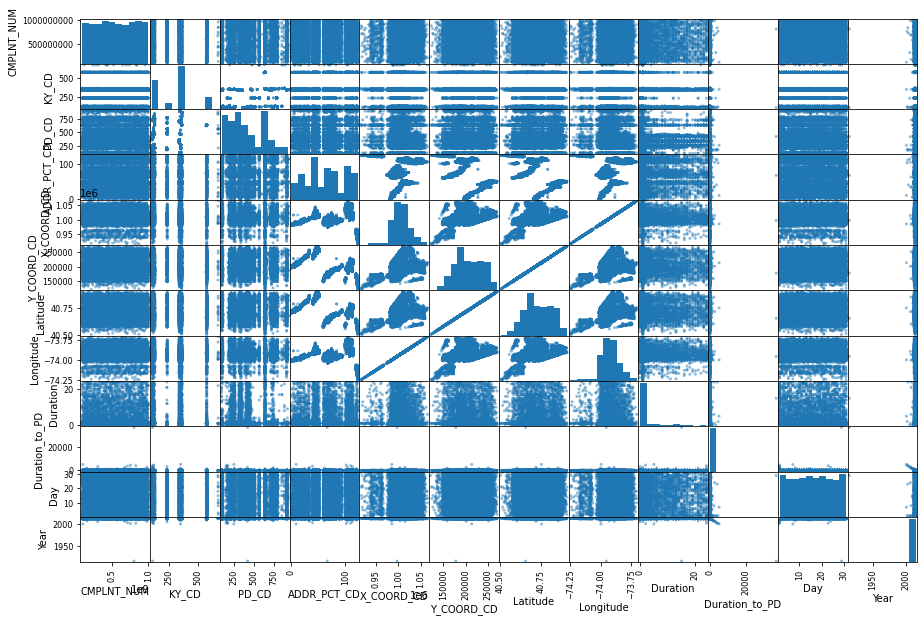

In [54]:
from pandas.plotting import scatter_matrix

ax = scatter_matrix(df_Crime_Sample,figsize=(15, 10))

### Trying another plotting approach with plotnine/ggplot

In [31]:
#source:  https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/
#source:  https://www.r-graph-gallery.com/2d-density-plot-with-ggplot2.html
#source:  http://zevross.com/blog/2014/08/04/beautiful-plotting-in-r-a-ggplot2-cheatsheet-3/

import numpy as np
import pandas as pd
from plotnine import *

%matplotlib inline

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 32417 rows containing missing values.


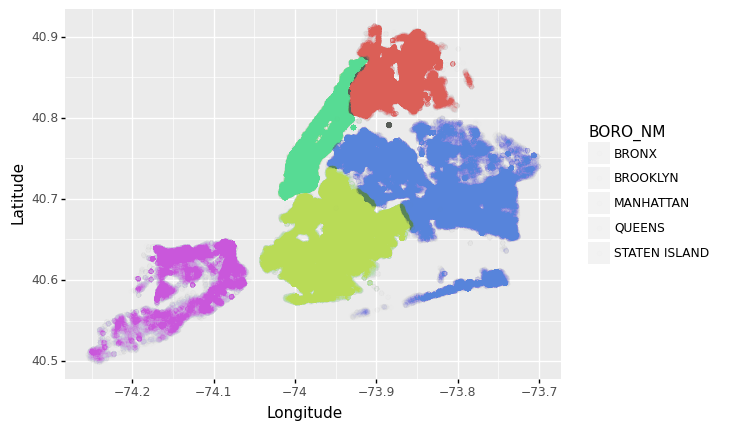

<ggplot: (194807490539)>

In [44]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude',
    color = 'BORO_NM')) + geom_point(alpha=.005)

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_density_2d : Removed 32417 rows containing non-finite values.


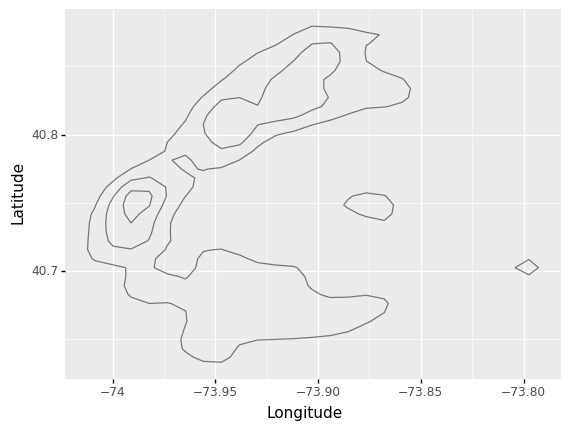

<ggplot: (194813690248)>

In [45]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d(alpha=.5)

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_density_2d : Removed 32417 rows containing non-finite values.


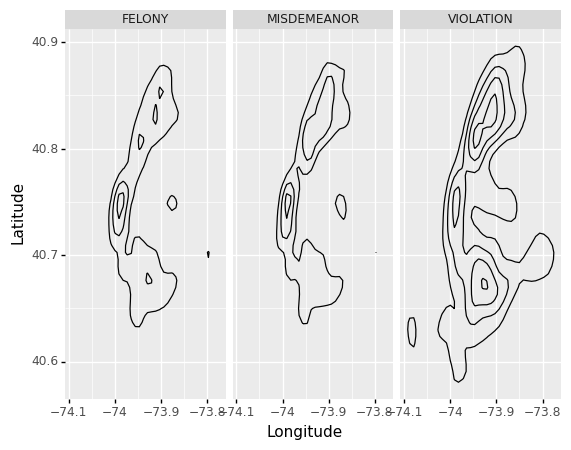

<ggplot: (194813352388)>

In [46]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d() + facet_wrap(['LAW_CAT_CD'])

In [50]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + stat_density_2d_filled()

NameError: name 'stat_density_2d_filled' is not defined

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_density_2d : Removed 32417 rows containing non-finite values.


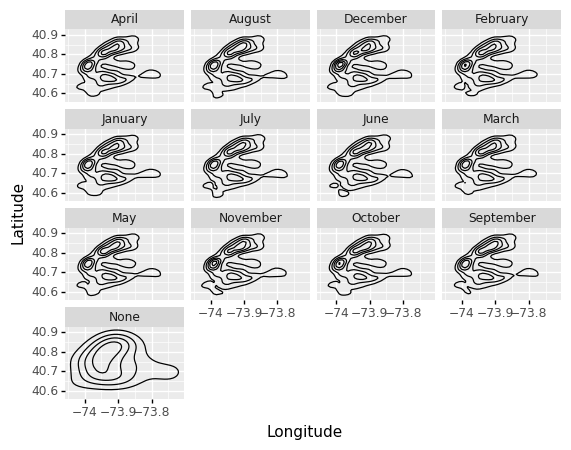

<ggplot: (194813352427)>

In [51]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude')) + geom_density_2d() + facet_wrap(['Month'])

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 32417 rows containing missing values.


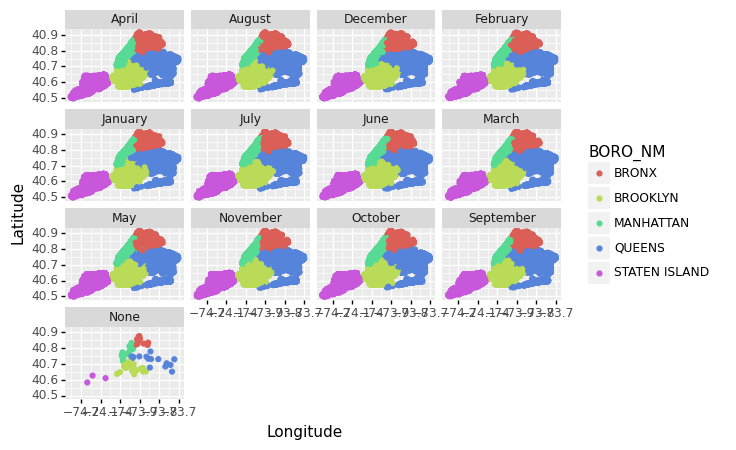

<ggplot: (194785277052)>

In [52]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude', color = 'BORO_NM')) + geom_point() + facet_wrap(['Month'])

C:\Users\sabrina.purvis\Anaconda3\envs\ML7331\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_point : Removed 32417 rows containing missing values.


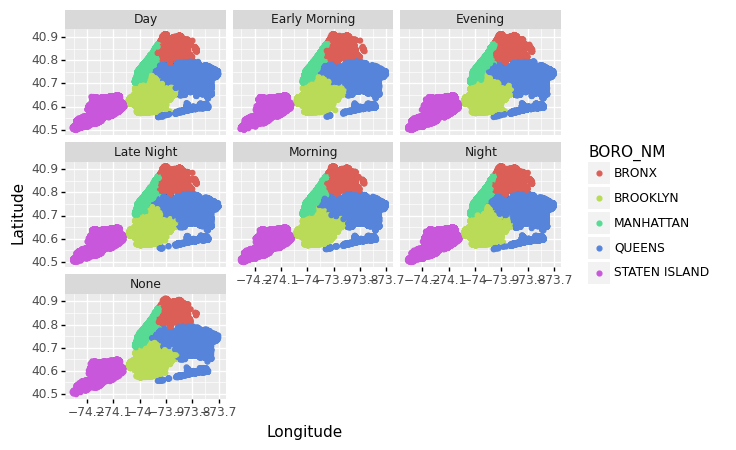

<ggplot: (194783624584)>

In [55]:
ggplot(df_Crime, aes(x='Longitude', y='Latitude', color = 'BORO_NM')) + geom_point() + facet_wrap(['Daytime'])

In [ ]:
map = Basemap(llcrnrlon=df_Crime.Longitude.min(),llcrnrlat=df_Crime.Latitude.min(),urcrnrlon=df_Crime.Longitude.max(),urcrnrlat=df_Crime.Latitude.max(),
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)